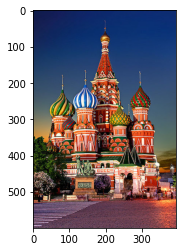

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('1-Saint-Basils-Cathedral.jpg')
plt.imshow(img)

In [7]:
print(img.shape)

(600, 394, 3)


In [9]:
img_data = (img / 255.0).reshape(600 * 394, 3)
print(img_data.shape)

(236400, 3)


In [10]:
from sklearn.cluster import MiniBatchKMeans

In [12]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

In [22]:
from ipywidgets import interact, IntSlider
import os
import numpy as np

img_dir ='sample_data/'

@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1, max=256,step=1, value=16, 
                                                      countinuous_update=False,
                                                      layout=dict(width='100'))):
  input_img = mpimg.imread(img_dir+image)
  img_data = (input_img / 255.0).reshape(-1, 3)

  kmeans = MiniBatchKMeans().fit(img_data)
  k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

  k_img = np.reshape(k_colors, (input_img.shape))

  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.suptitle('K-Means Image Compression', fontsize=20)

  ax1.set_title('Compressed')
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax1.imshow(k_img)


  ax2.set_title('Original')
  ax2.set_xticks([])
  ax2.set_yticks([])
  ax2.imshow(input_img)

  plt.subplots_adjust(top=0.85)
  plt.show()

interactive(children=(Dropdown(description='image', options=('anscombe.json', 'README.md', '3-peacock.jpg', '4…